In [1]:
import sys
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# WIREPLANE U

In [2]:
wireplane = "U"
sig_name = wireplane+"-signal"
cln_name = wireplane+"-clnsig"
nticks = 200
# NEW DATA SET WITH
path_cc = "../../Workspace/new_data/train_v1/nu_cc/"
path_es = "../../Workspace/new_data/train_v1/nu_es/"

In [3]:
def get_data(path1, path2, energy_range):
    filenames1 = [path1+f for f in listdir(path1) if (isfile(join(path1, f)) 
                    and sig_name in f and energy_range in f)]
    clean_filenames1= [path1+f for f in listdir(path1) if (isfile(join(path1, f))
                            and cln_name in f and energy_range in f)]

    filenames2 = [path2+f for f in listdir(path2) if (isfile(join(path2, f)) 
                    and sig_name in f and energy_range in f)]
    clean_filenames2= [path2+f for f in listdir(path2) if (isfile(join(path2, f))
                            and cln_name in f and energy_range in f)]


    combined_data_cc = np.concatenate([np.load(fname) for fname in filenames1])
    combined_clean_data_cc = np.concatenate([np.load(fname) for fname in clean_filenames1])

    combined_data_es = np.concatenate([np.load(fname) for fname in filenames2])
    combined_clean_data_es = np.concatenate([np.load(fname) for fname in clean_filenames2])

    return combined_data_cc, combined_clean_data_cc, combined_data_es, combined_clean_data_es

In [4]:
def get_adcs(path1, path2, energy_range):
    combined_data_cc, combined_clean_data_cc, combined_data_es, combined_clean_data_es = get_data(path_cc, path_es, energy_range)
    adcs_cc = np.array([combined_data_cc['adc0'], combined_data_cc['adc1'],
                    combined_data_cc['adc2'], combined_data_cc['adc3'],
                    combined_data_cc['adc4']]).T

    adcs_es = np.array([combined_data_es['adc0'], combined_data_es['adc1'],
                    combined_data_es['adc2'], combined_data_es['adc3'],
                    combined_data_es['adc4']]).T
    
    max_adcs_cc = []
    for adc in adcs_cc:
        max_adcs_cc.append(max(adc))
    
    max_adcs_es = []
    for adc in adcs_es:
        max_adcs_es.append(max(adc))

    return max_adcs_cc, max_adcs_es    

In [5]:
energies = {
    "en0": "0.005-0.010 GeV",
    "en1": "0.010-0.013 GeV",
    "en2": "0.013-0.016 GeV",
    "en3": "0.016-0.019 GeV",
    "en4": "0.019-0.021 GeV",
    "en5": "0.021-0.024 GeV",
    "en6": "0.024-0.027 GeV",
    "en7": "0.027-0.031 GeV",
    "en8": "0.031-0.036 GeV",
    "en9": "0.036-0.079 GeV"
}

In [6]:
adc_modes = {
    0: "considers all ADCs",
    1: "considers ADC <= 3",
    2: "considers ADC > 3",
    3: "considers ADCs between 3 and 10",
    4: "considers ADC > 10"

}
def filter_adc(adcs, mode):
    adcs = np.array(adcs)        # mode = 0
    adc_lt_3 = adcs[adcs <= 3]   # mode = 1
    adc_gt_3 = adcs[adcs > 3]    # mode = 2
    fil1 = adcs[adcs > 3]
    adc_3_10 = fil1[fil1 <= 10]  # mode = 3
    adc_gt_10 = adcs[adcs > 10]  # mode = 4
    res = [adcs, adc_lt_3, adc_gt_3, adc_3_10, adc_gt_10]
    return res[mode]
    

In [7]:
def make_hist_adc(path1, path2, energy_range, adc_mode):
    max_adcs_cc, max_adcs_es = get_adcs(path1, path2, energy_range)
    total_cc = len(max_adcs_cc)
    total_es = len(max_adcs_es)
    max_adcs_cc = filter_adc(max_adcs_cc, adc_mode)
    max_adcs_es = filter_adc(max_adcs_es, adc_mode)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 4))
    fig.suptitle('ADC distribution for energy ' + energy_range + ': ' + energies[energy_range], fontsize=15)
    if adc_mode == 1 or adc_mode == 3:
        ax1.hist(max_adcs_cc, color='blue', label= adc_modes[adc_mode] + " (total count: " + str(len(max_adcs_cc)) +")")
    else:
        ax1.hist(max_adcs_cc, bins=1600, color='blue', label= adc_modes[adc_mode] + " (total count: " + str(len(max_adcs_cc)) +")")
    
    ax1.set_title("nu_cc (full data has " + str(total_cc) + " entries)", fontsize=15)
    ax1.set_xlabel("ADC", fontsize=12)
    ax1.set_ylabel("count", fontsize=12)
    ax1.legend(fontsize=12)
    
    if adc_mode == 1 or adc_mode == 3:
        ax2.hist(max_adcs_es, color='blue', label= adc_modes[adc_mode] + " (total count: " + str(len(max_adcs_es)) +")")
    else:
        ax2.hist(max_adcs_es, bins=1600, color='blue', label= adc_modes[adc_mode] + " (total count: " + str(len(max_adcs_es)) +")")
    ax2.set_title("nu_es (full data has " + str(total_es) + " entries)", fontsize=15)
    ax2.set_ylabel("count", fontsize=12)
    ax2.set_xlabel("ADC", fontsize=12)
    #ax2.set_xlim(xlim_es)
    #ax2.set_ylim(ylim_es)
    ax2.legend(fontsize=12)
    plt.show()

In [29]:
def get_percentage(adcs):
    adcs = np.array(adcs) 
    
    adc_lt_3 = adcs[adcs <= 3]
    lt_3_per = int(len(adc_lt_3)/len(adcs)*100)
    
    fil1 = adcs[adcs > 3]
    adc_3_10 = fil1[fil1 <= 10]
    per_3_10 = int(len(adc_3_10)/len(adcs)*100)
    
    adc_gt_10 = adcs[adcs > 10]
    gt_10_per = int(len(adc_gt_10)/len(adcs)*100)
    res = [lt_3_per, per_3_10, gt_10_per]
    return res

def make_per_hists(energy_range):
    max_adcs_cc, max_adcs_es = get_adcs(path_cc, path_es, energy_range)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 4))
    fig.suptitle('Percentage of entries by ADC range for ' + energy_range + ': ' + energies[energy_range], fontsize=15)
    ranges = ["ADC <= 3", "3 < ADC <= 10", "ADC < 10"]
    ax1.bar(ranges, get_percentage(max_adcs_cc))
    ax1.set_title("nu_cc", fontsize=15)

    ax2.bar(ranges, get_percentage(max_adcs_es))
    ax2.set_title("nu_es", fontsize=15)
    plt.show()

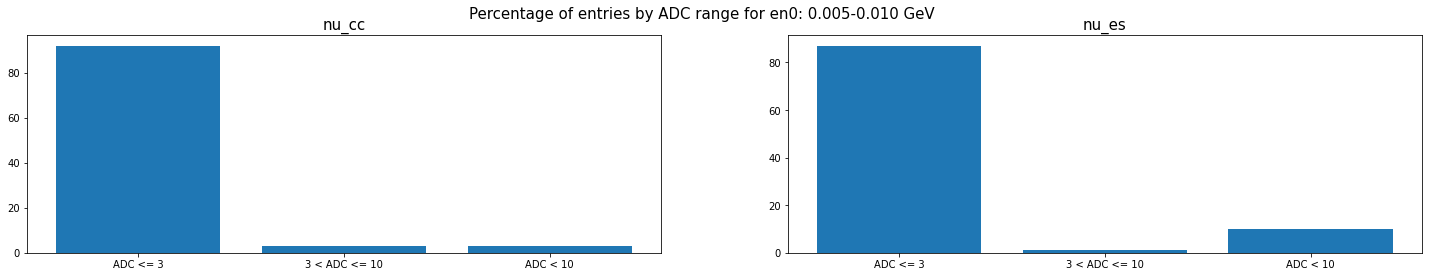

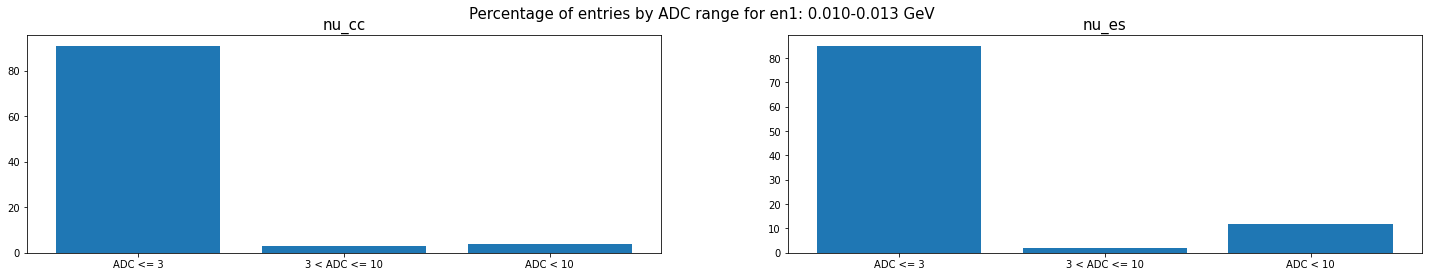

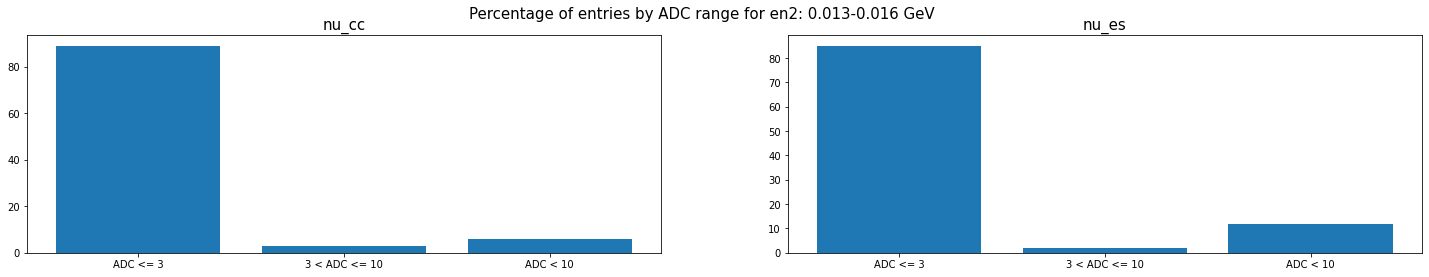

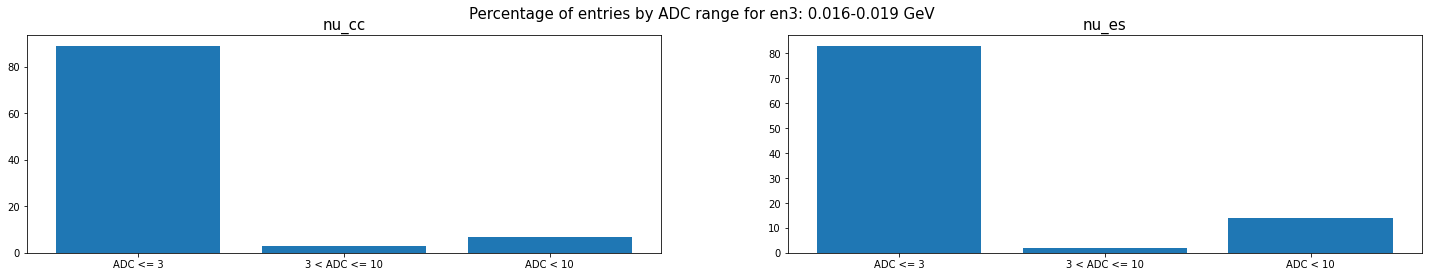

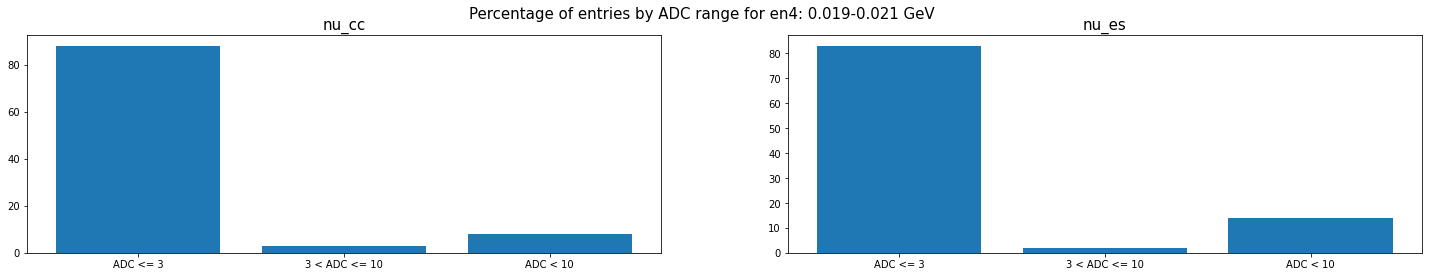

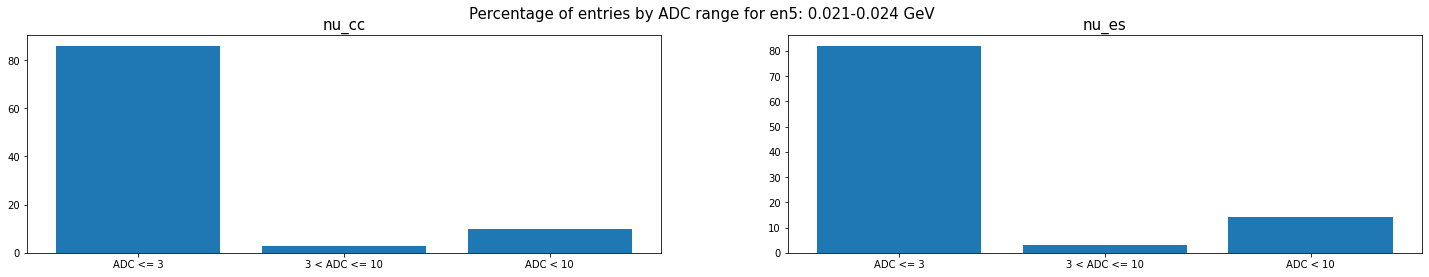

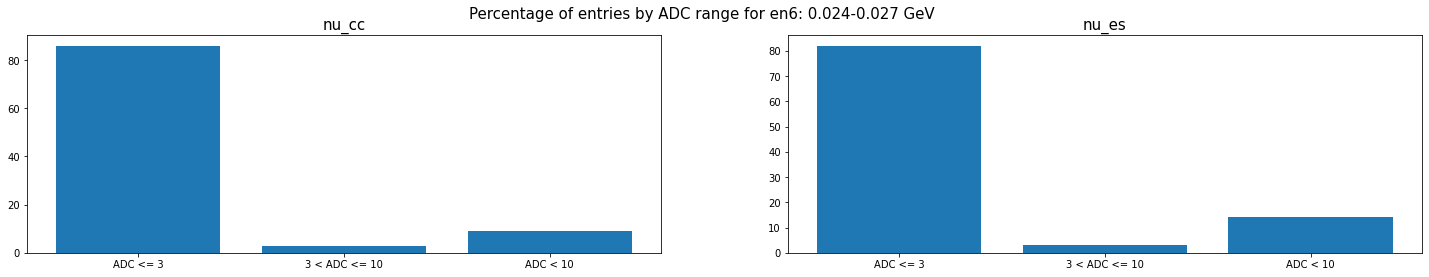

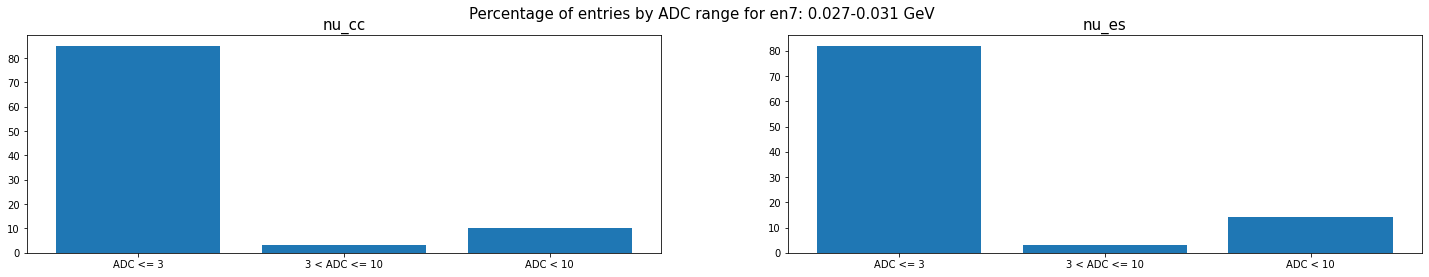

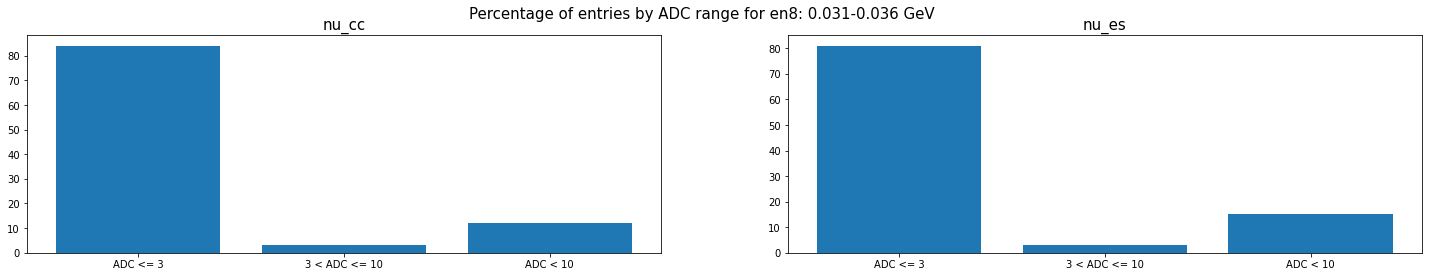

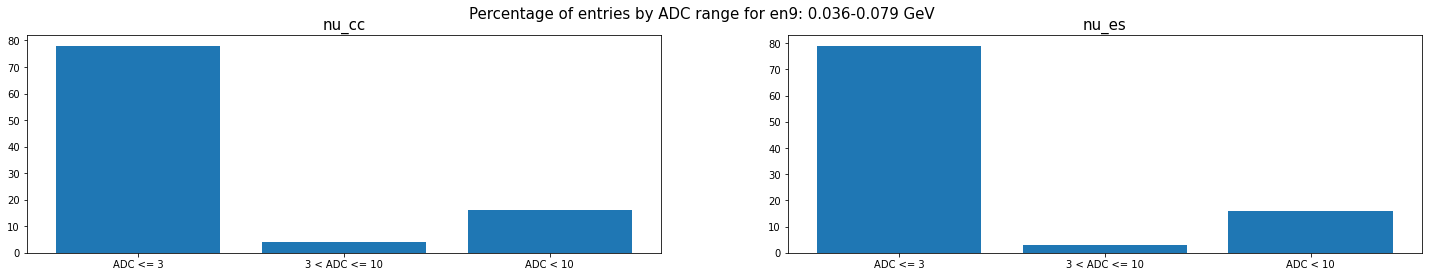

In [31]:
for i in range(10):
    make_per_hists("en"+str(i))

# en0: 0.005-0.010 GeV

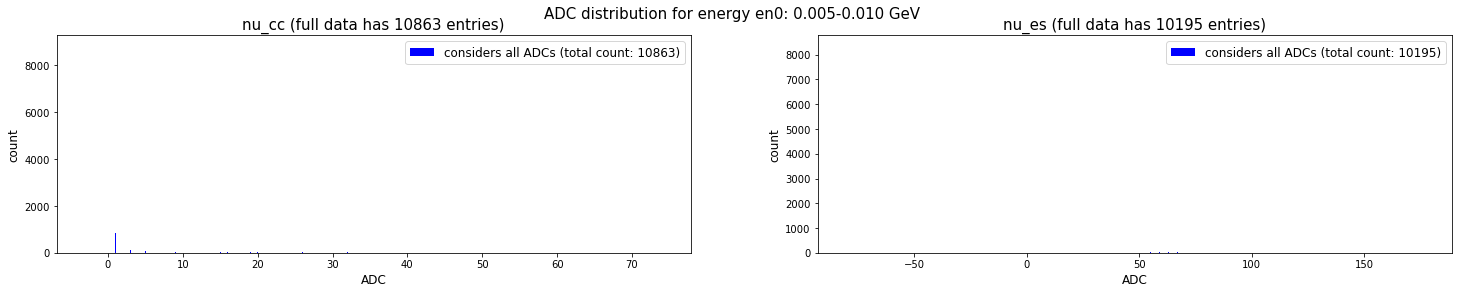

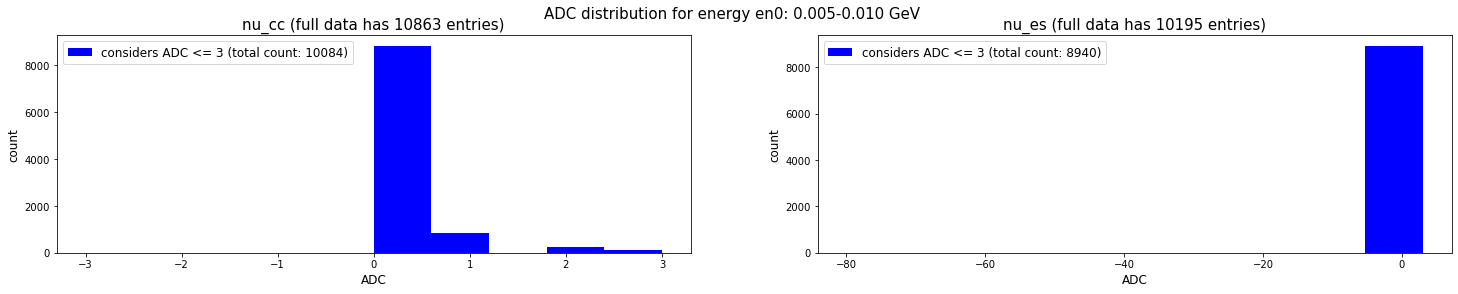

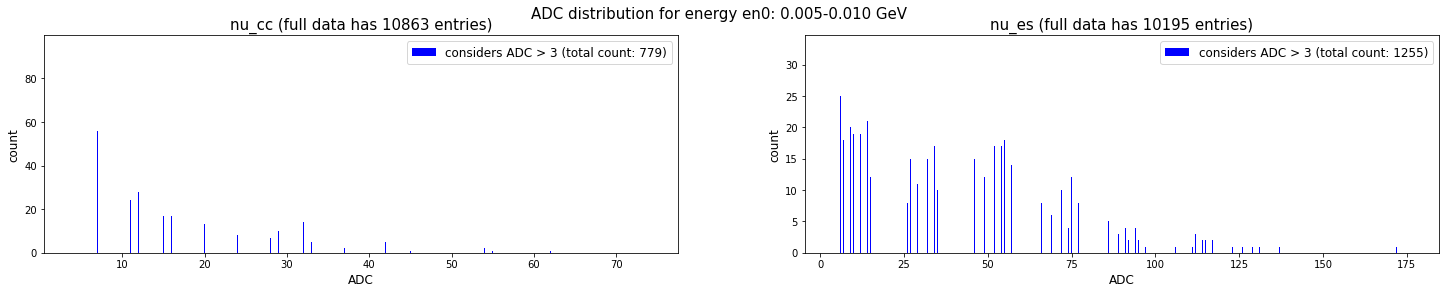

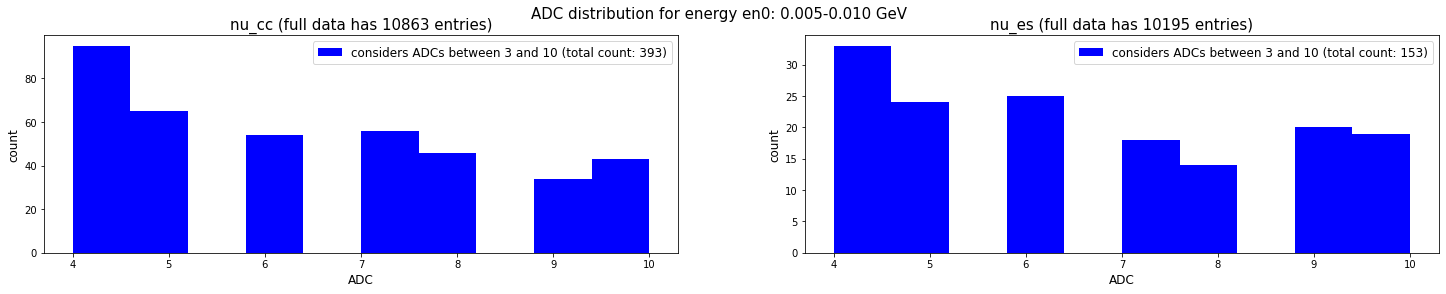

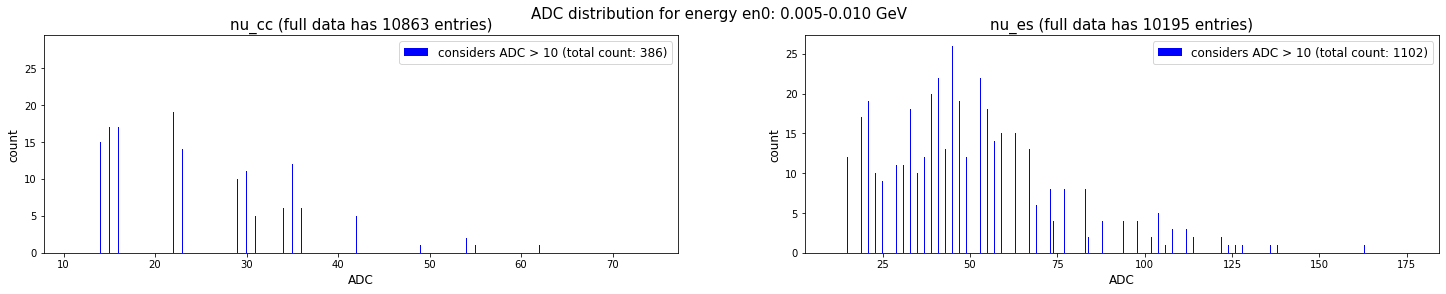

In [8]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en0",i)


# en1: 0.010-0.013 GeV

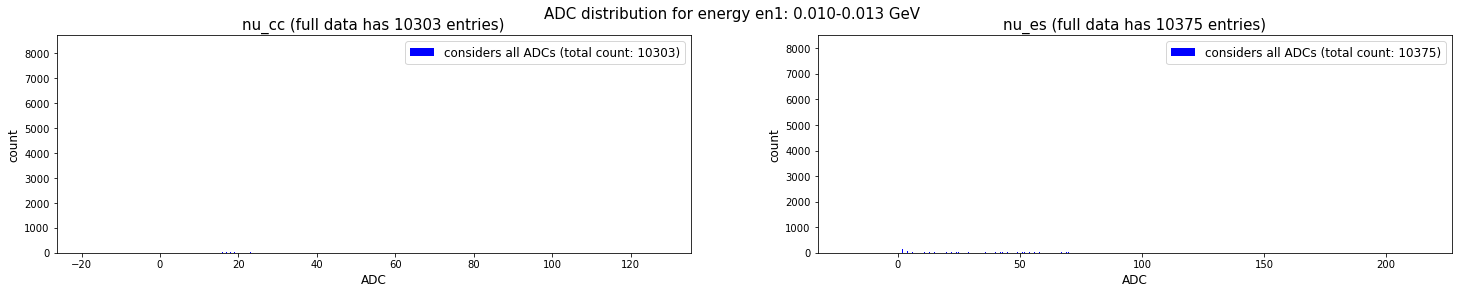

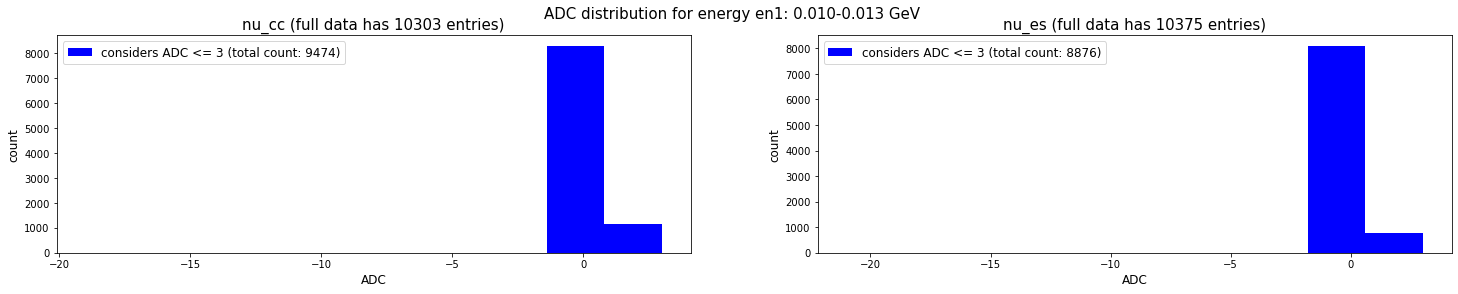

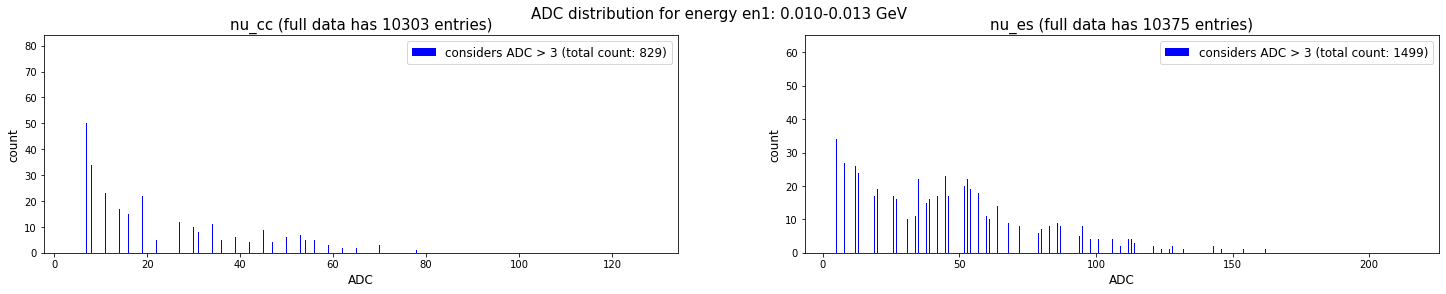

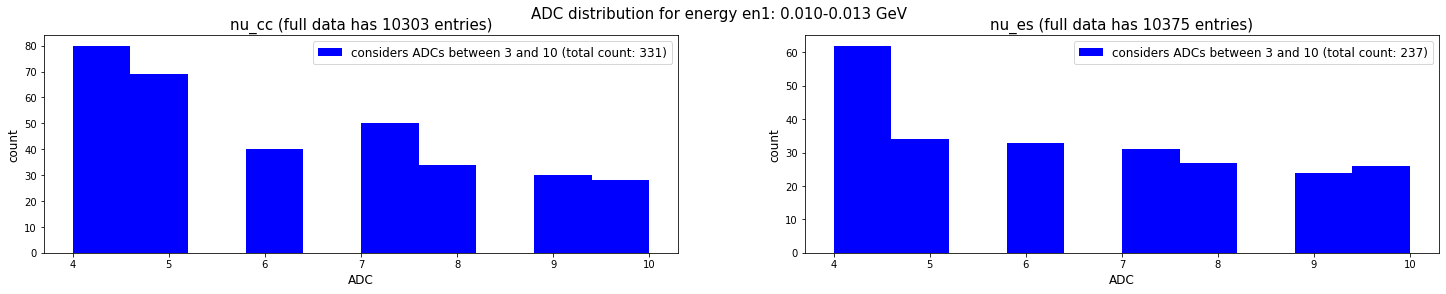

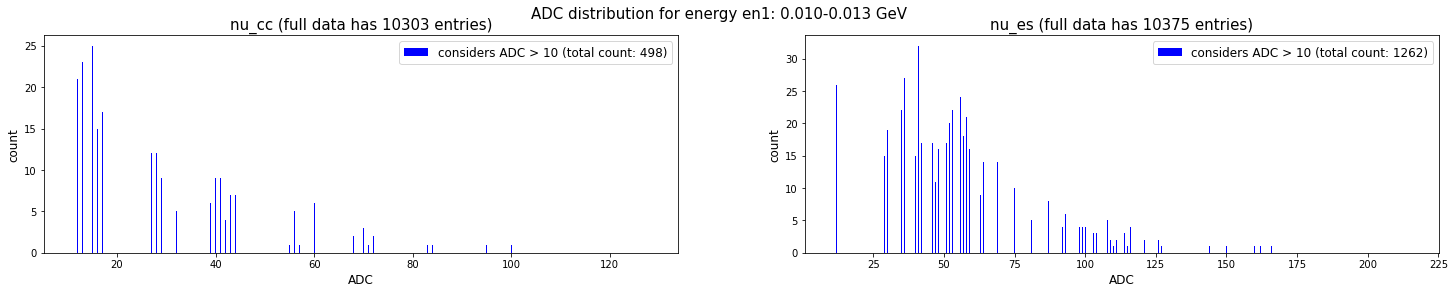

In [9]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en1",i)

# en2: 0.013-0.016 GeV

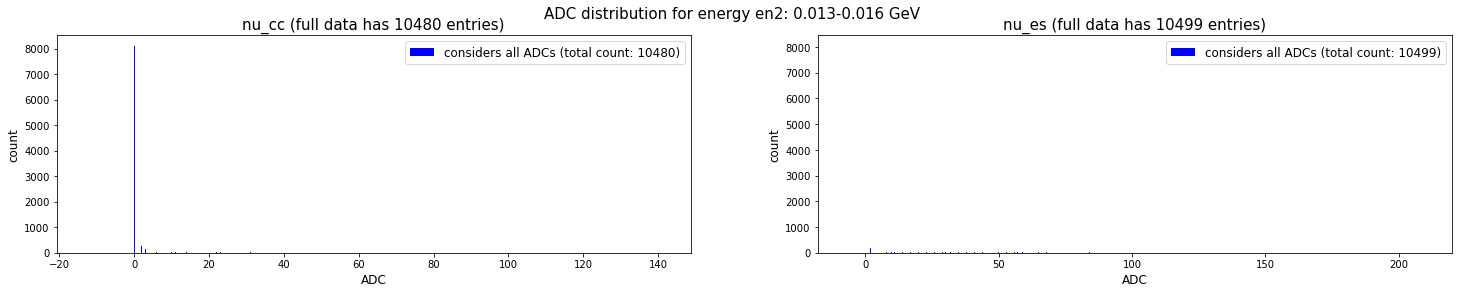

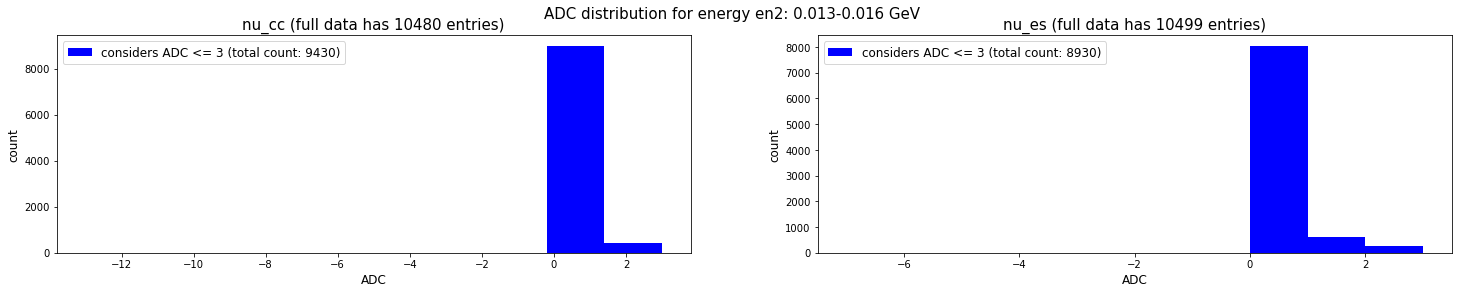

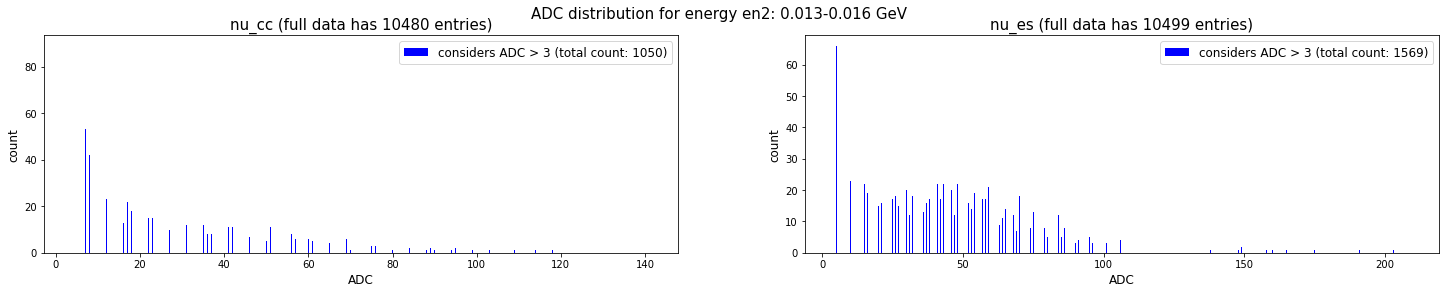

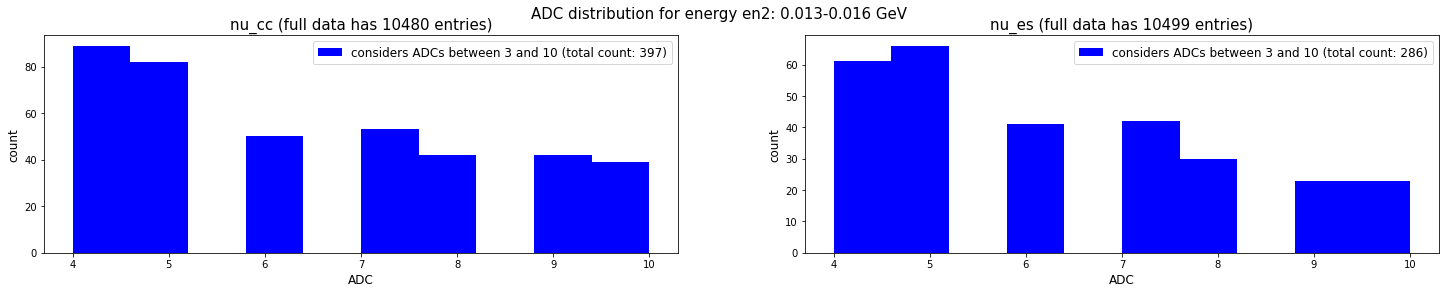

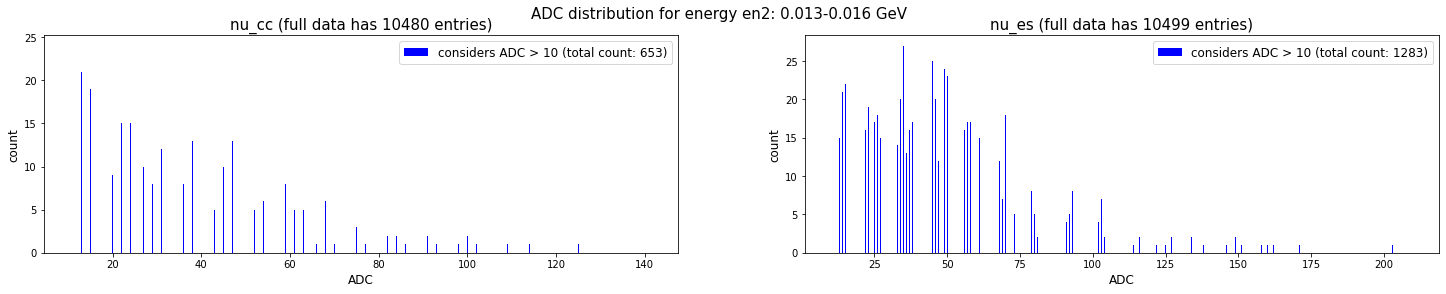

In [10]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en2",i)

# en3: 0.016-0.019 GeV

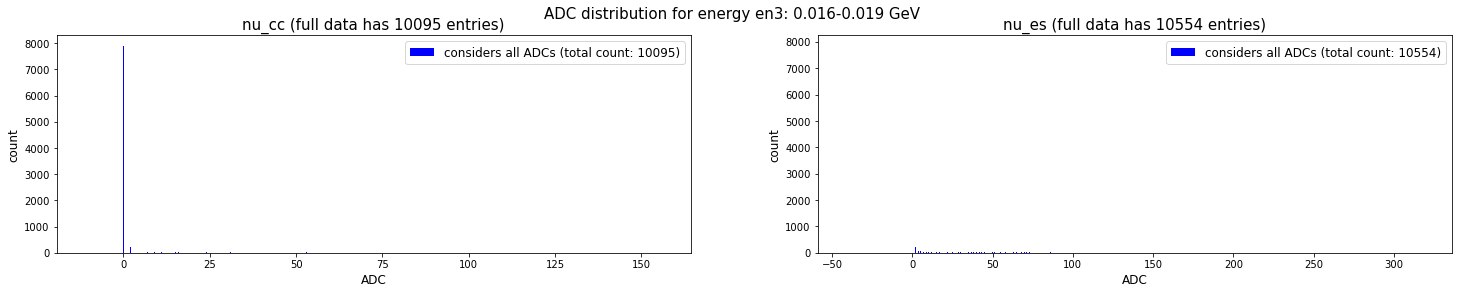

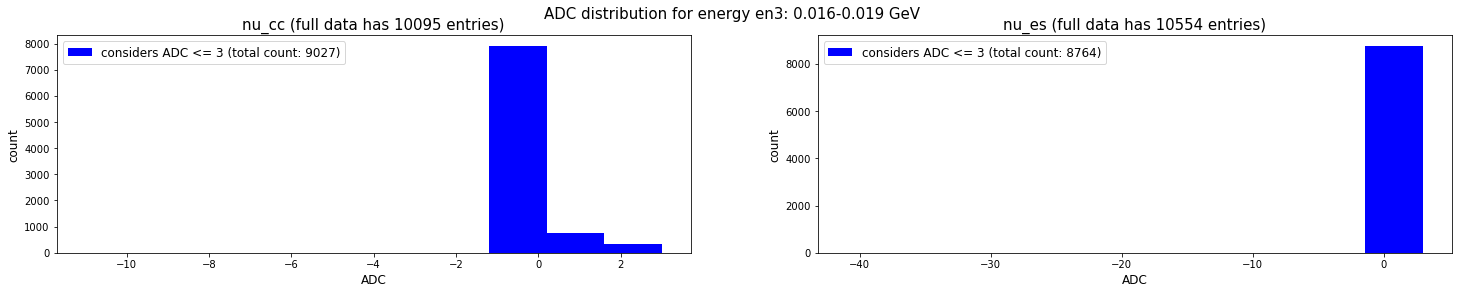

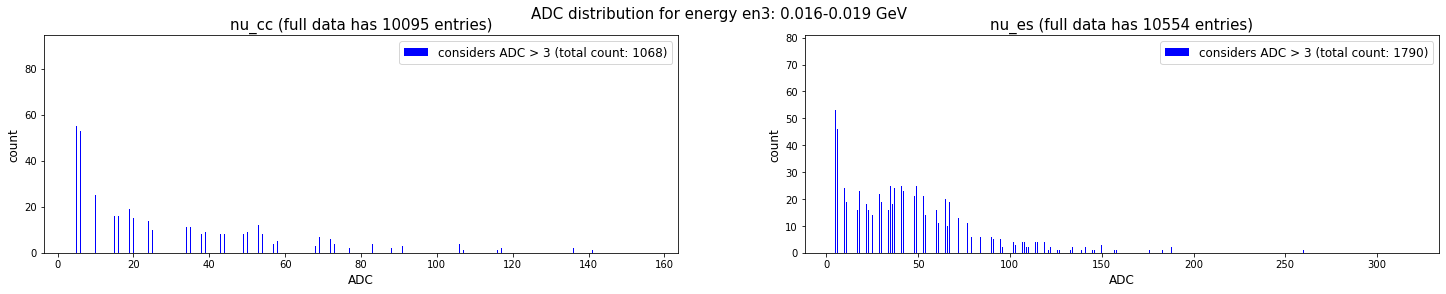

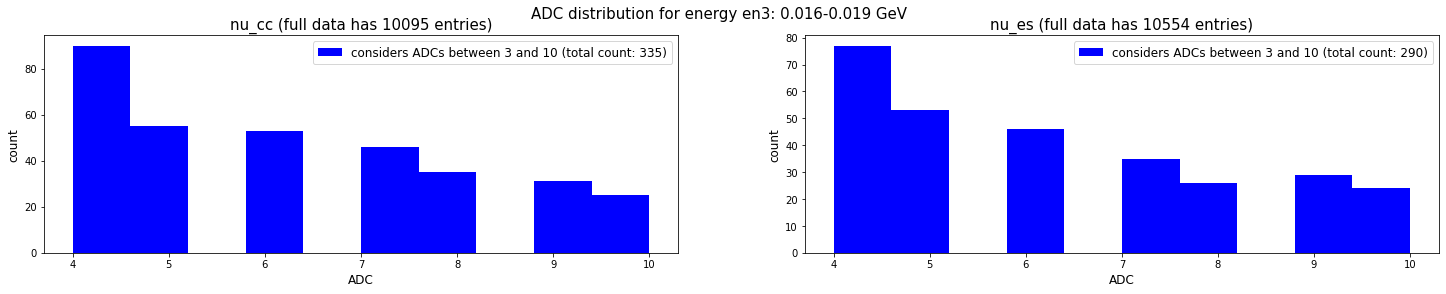

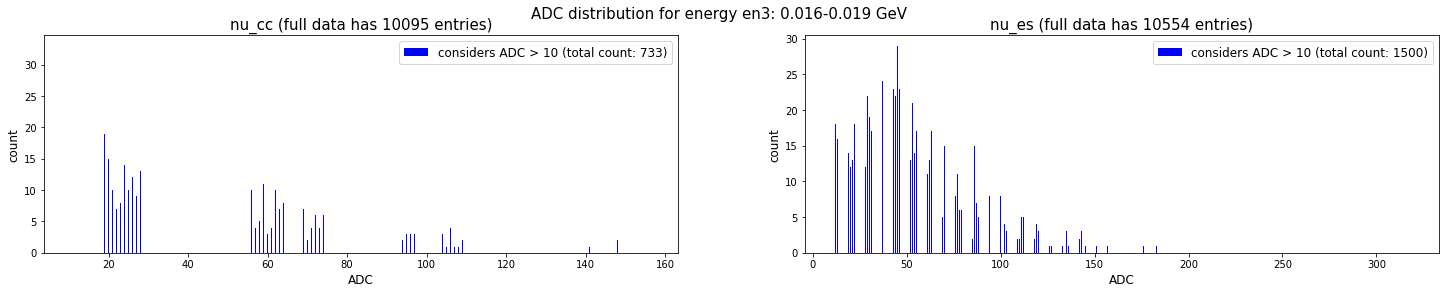

In [11]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en3",i)

# en4: 0.019-0.021 GeV

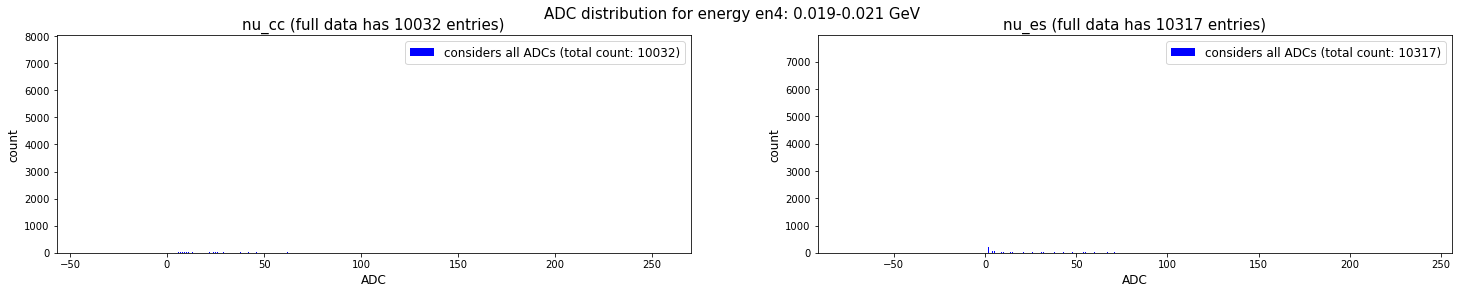

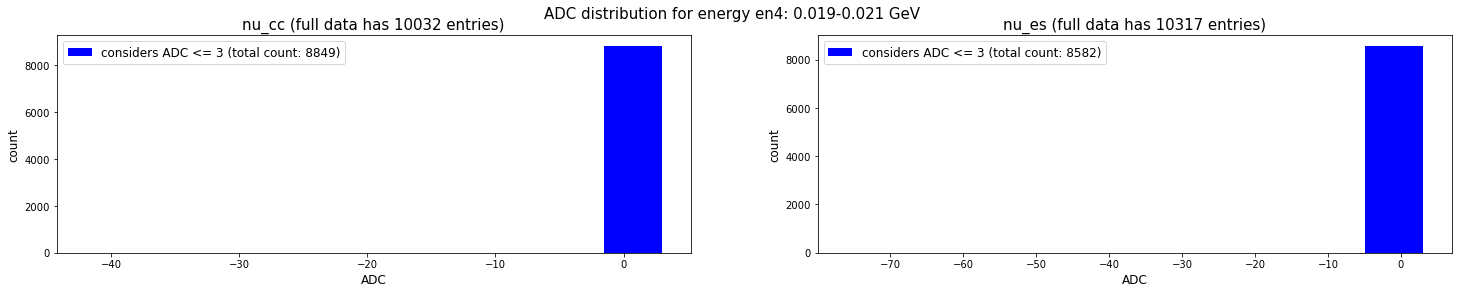

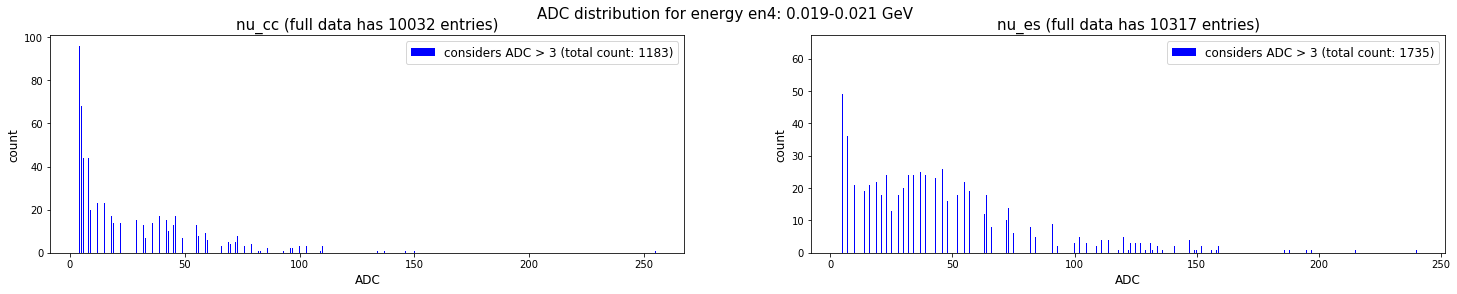

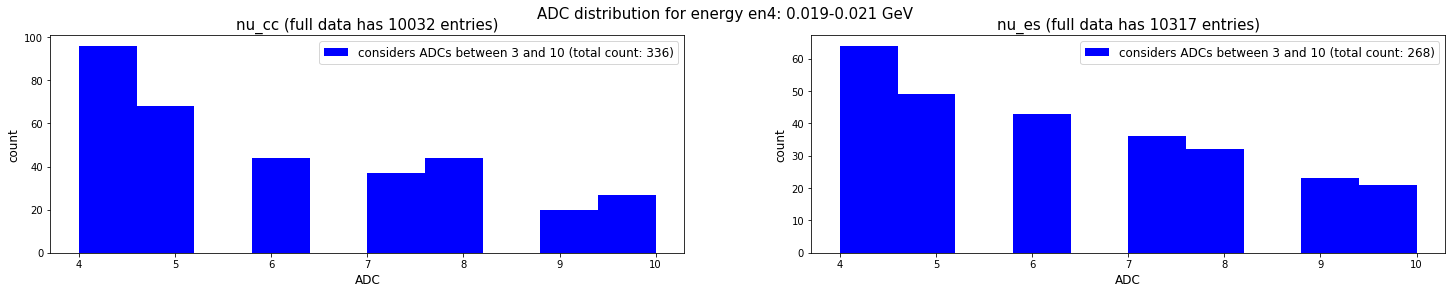

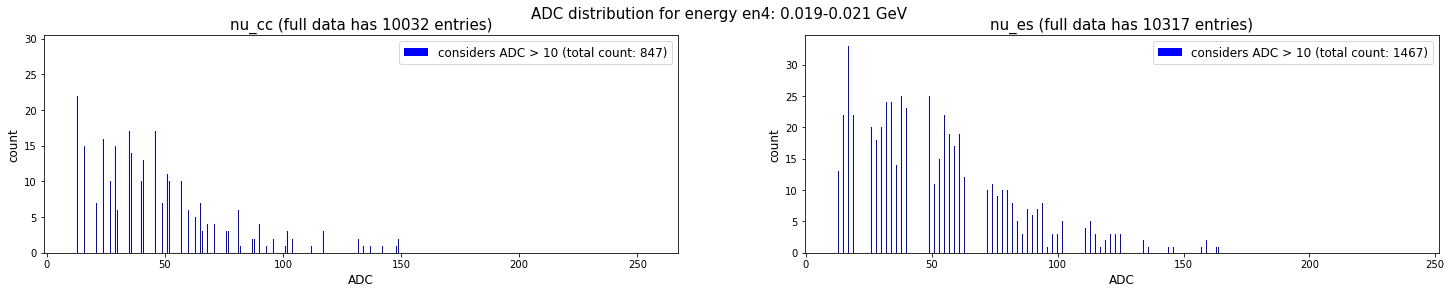

In [12]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en4",i)

# en5: 0.021-0.024 GeV

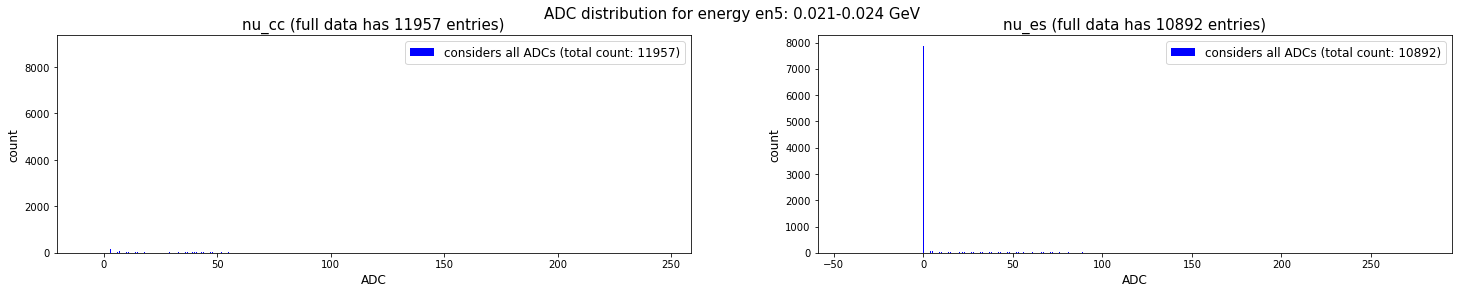

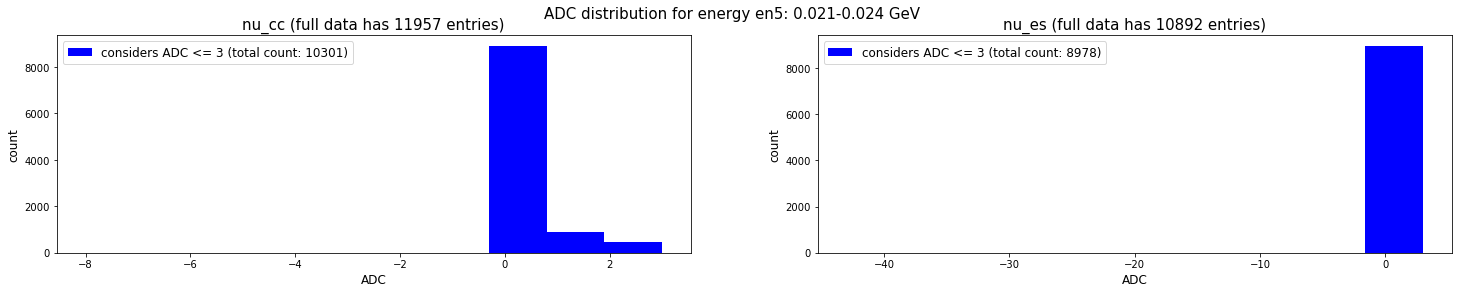

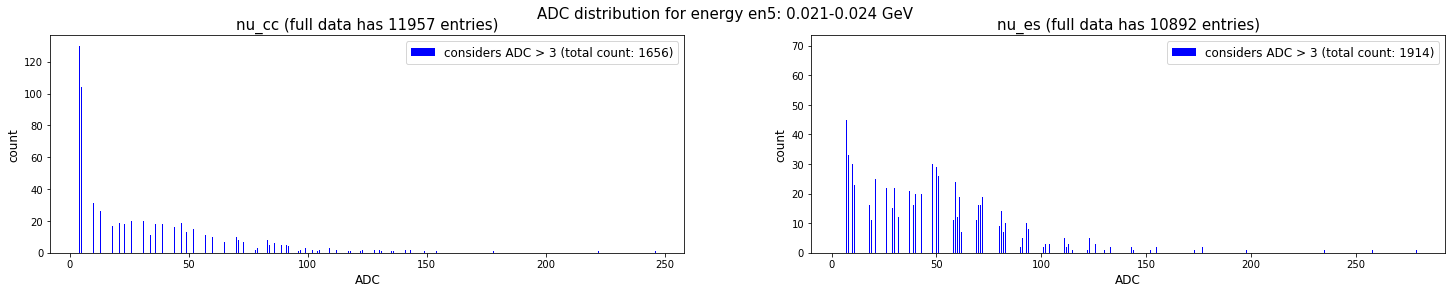

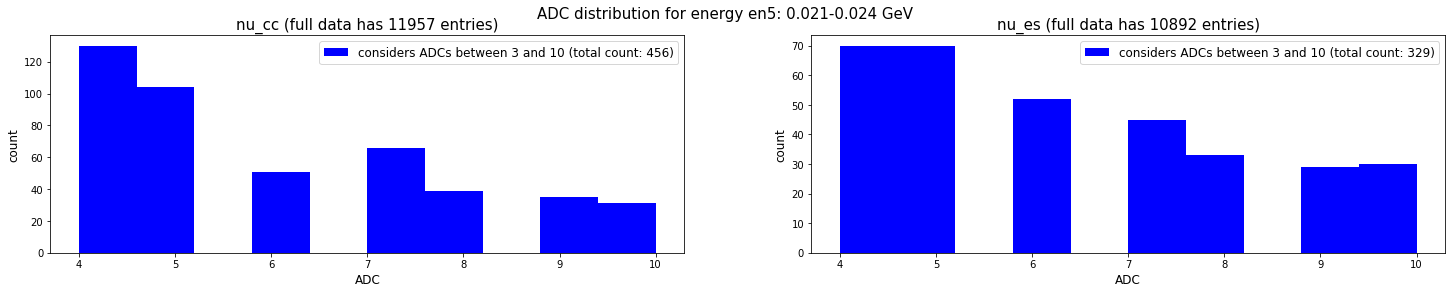

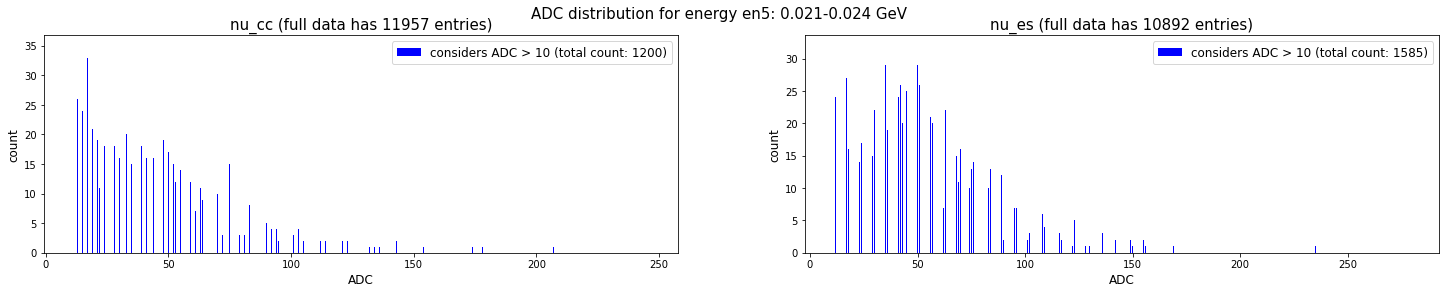

In [13]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en5",i)

# en6: 0.024-0.027 GeV

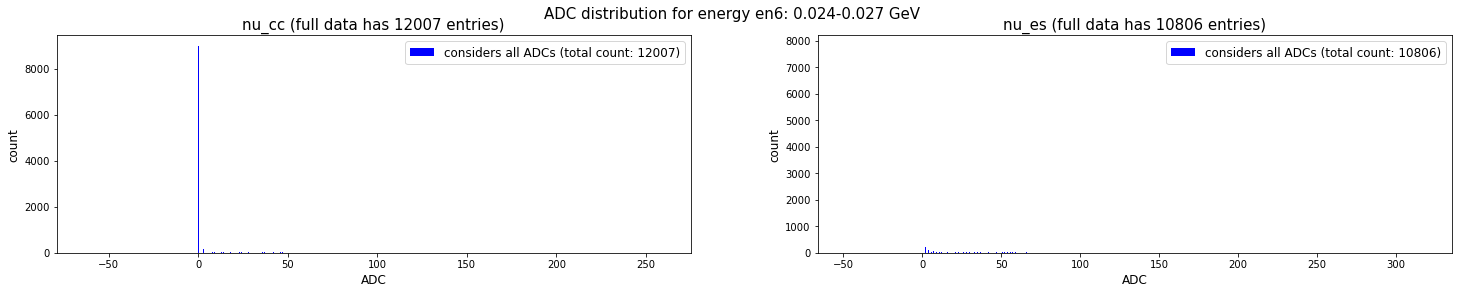

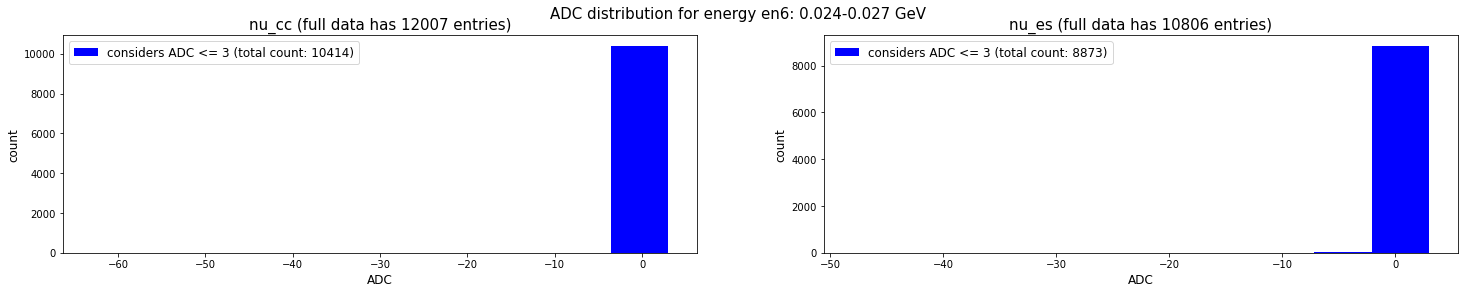

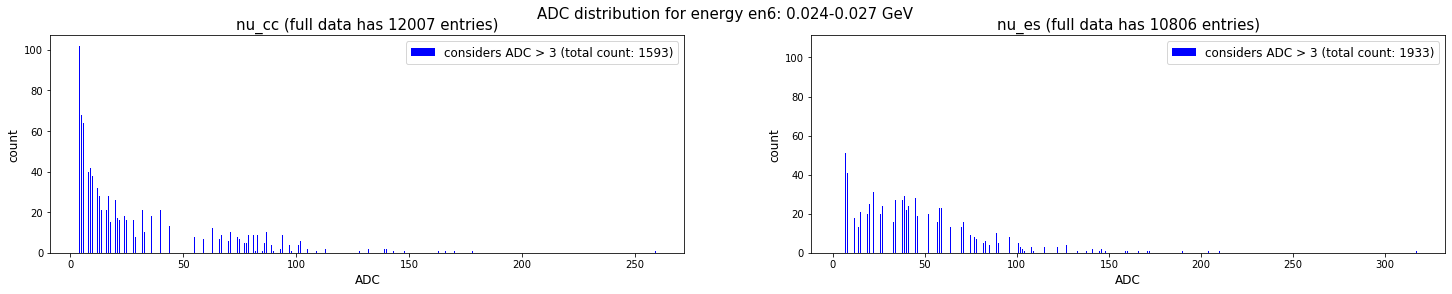

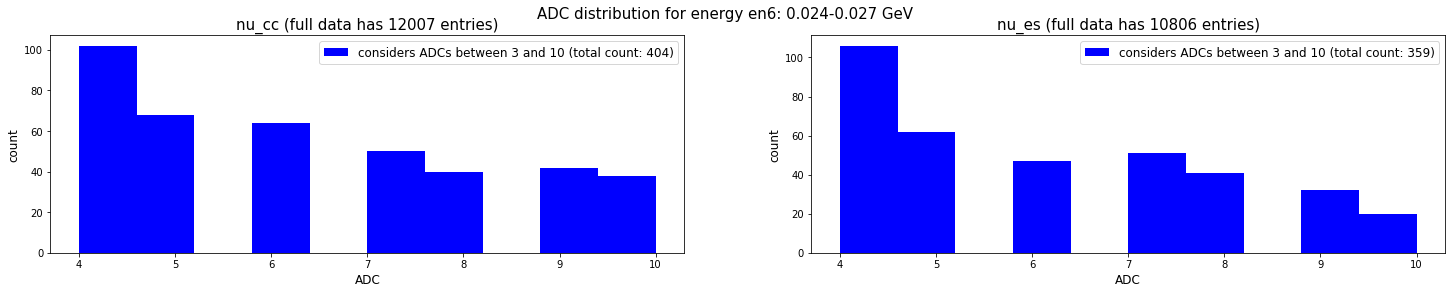

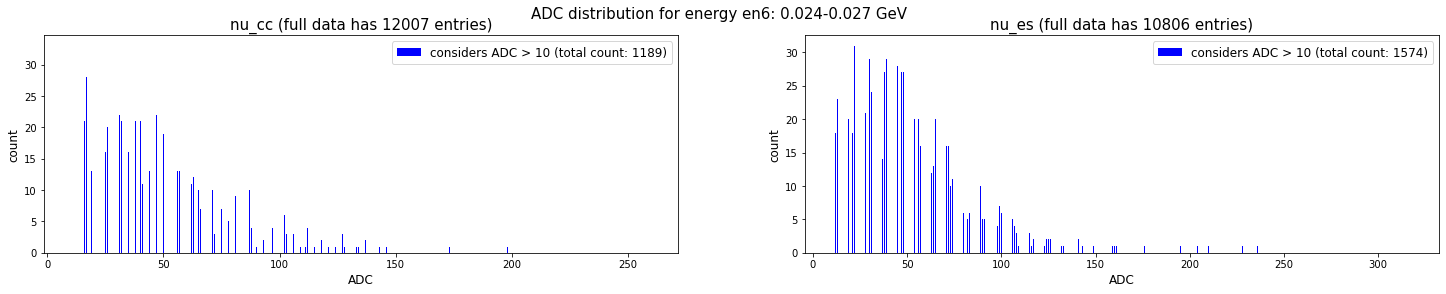

In [14]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en6",i)

# en7: 0.027-0.031 GeV

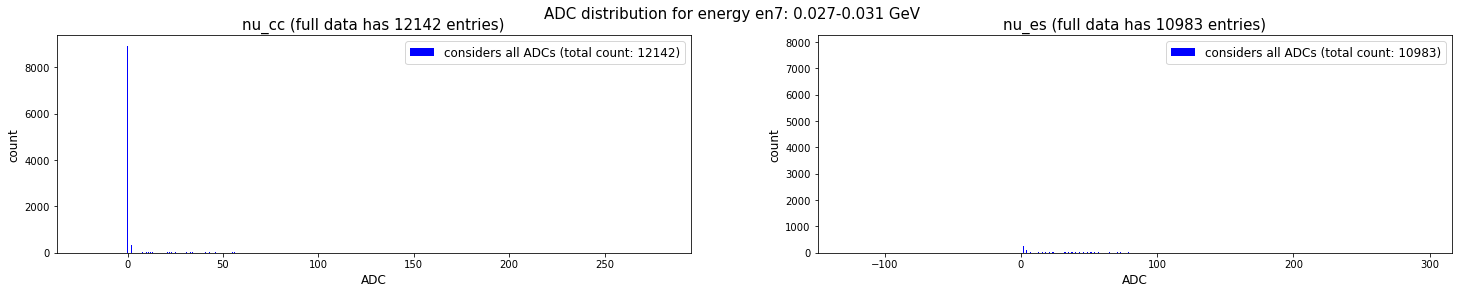

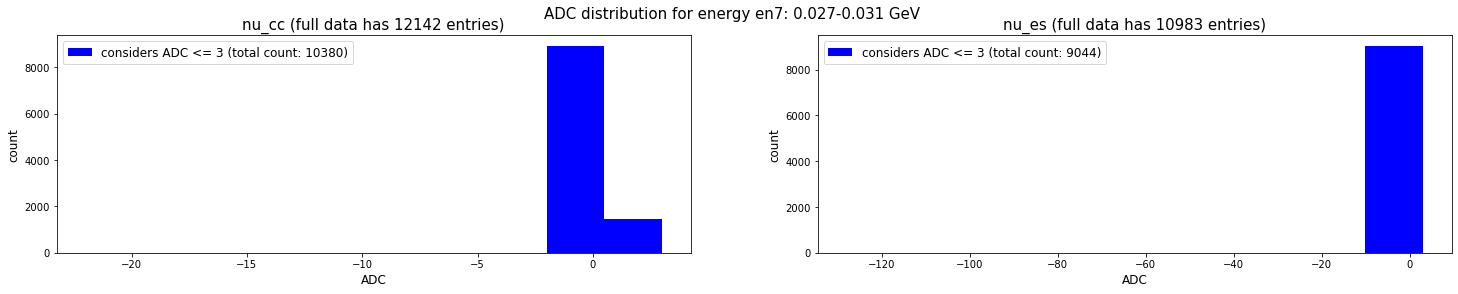

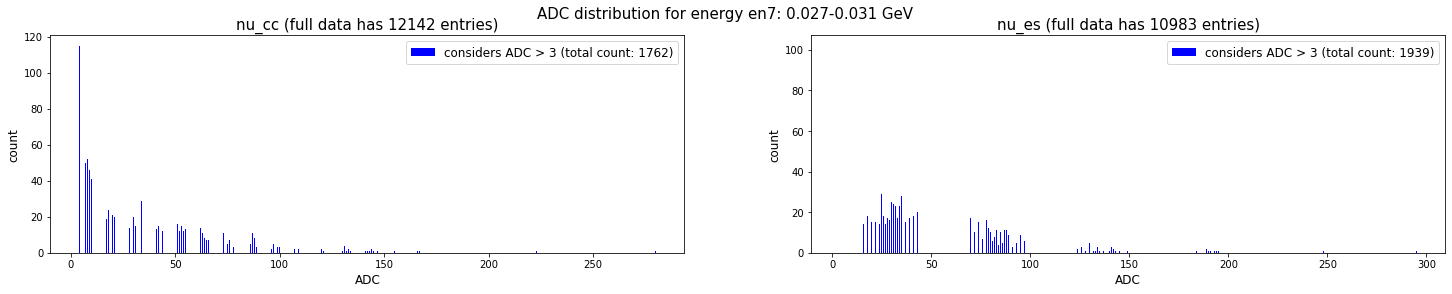

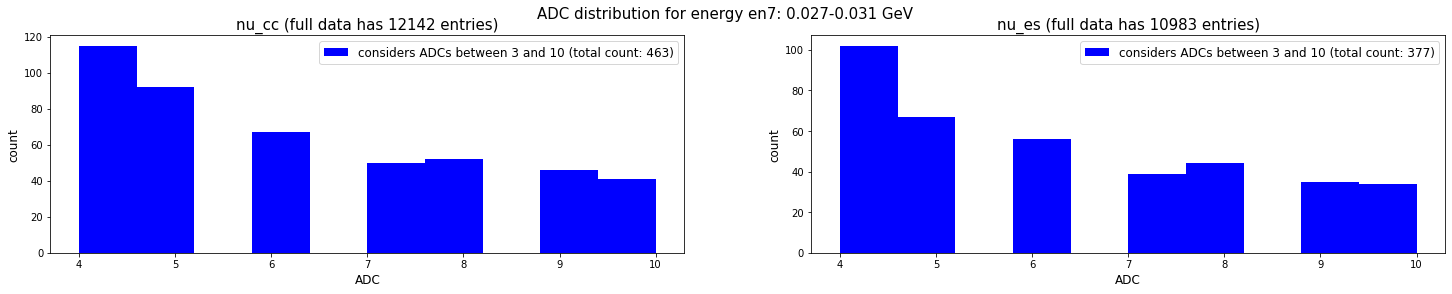

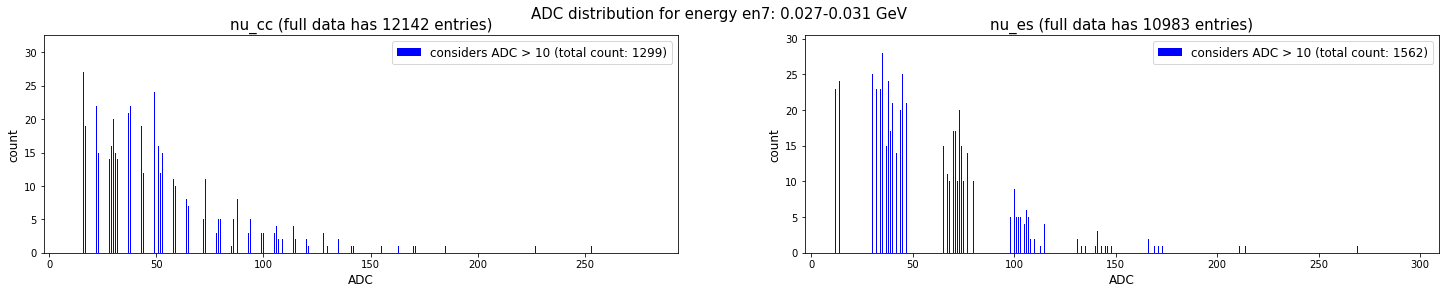

In [15]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en7",i)

# en8: 0.031-0.036 GeV

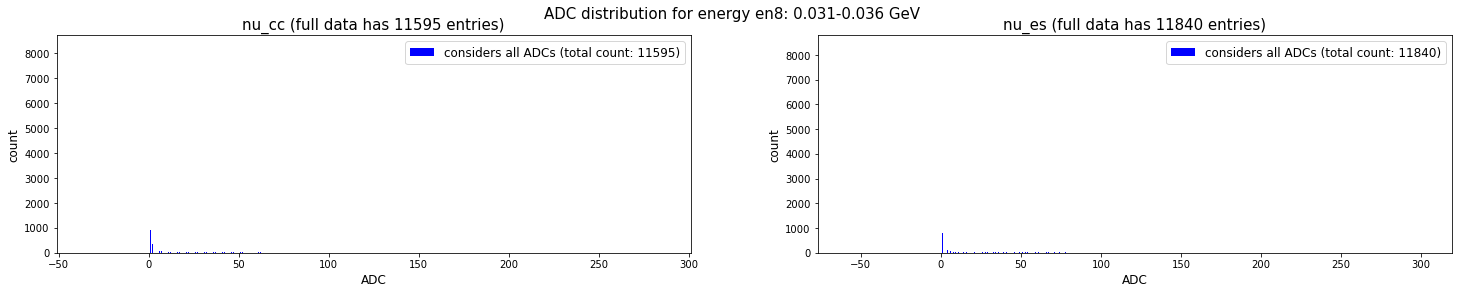

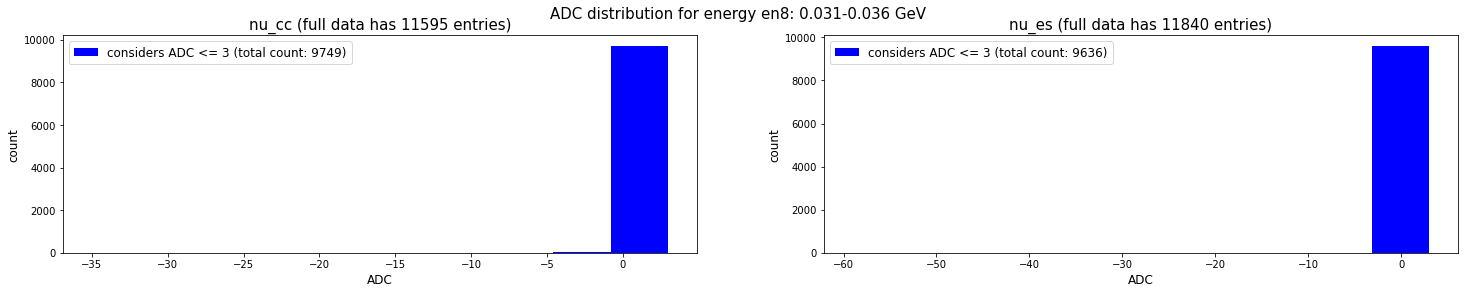

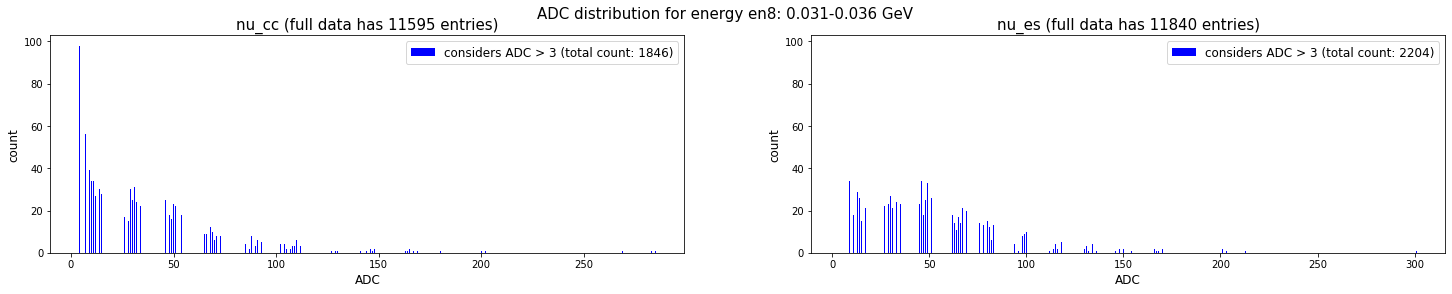

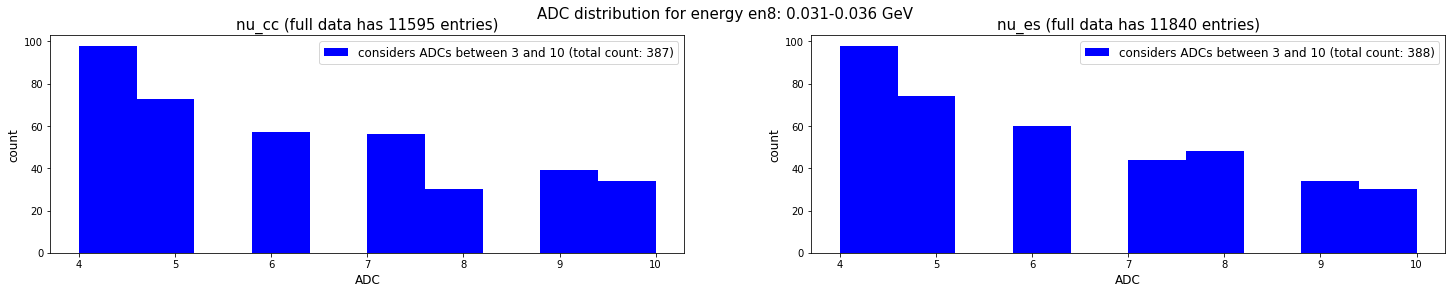

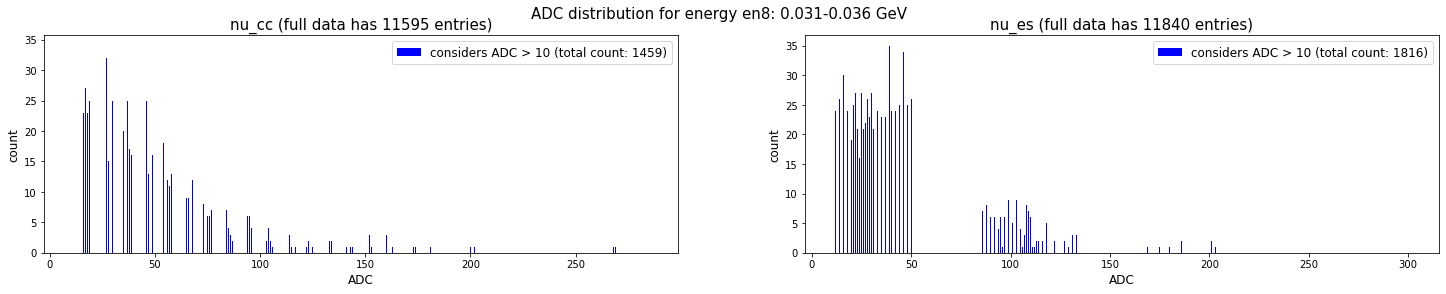

In [16]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en8",i)

# en9: 0.036-0.079 GeV

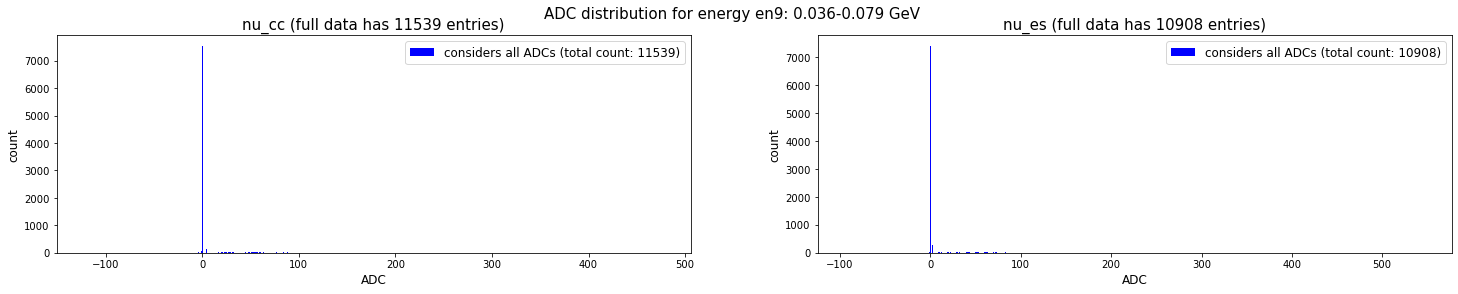

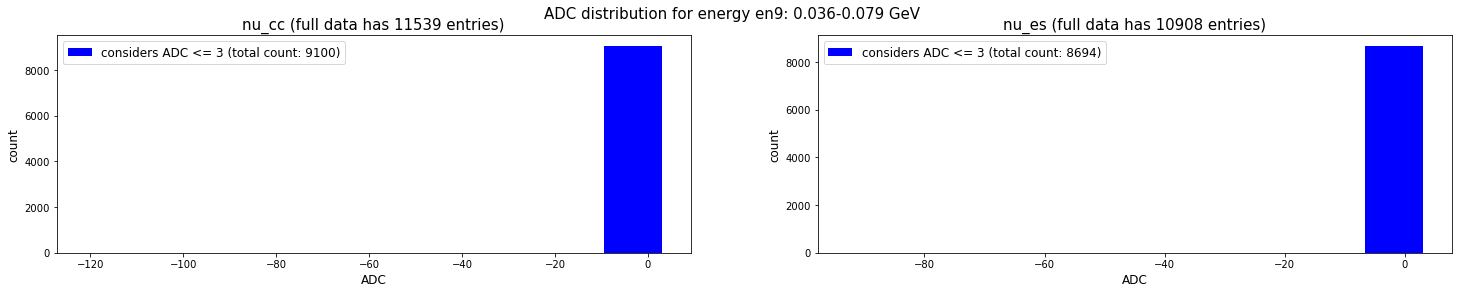

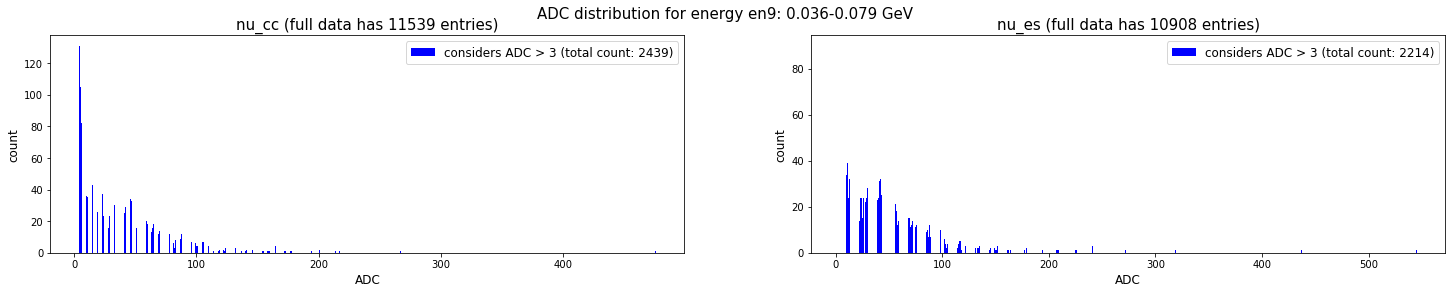

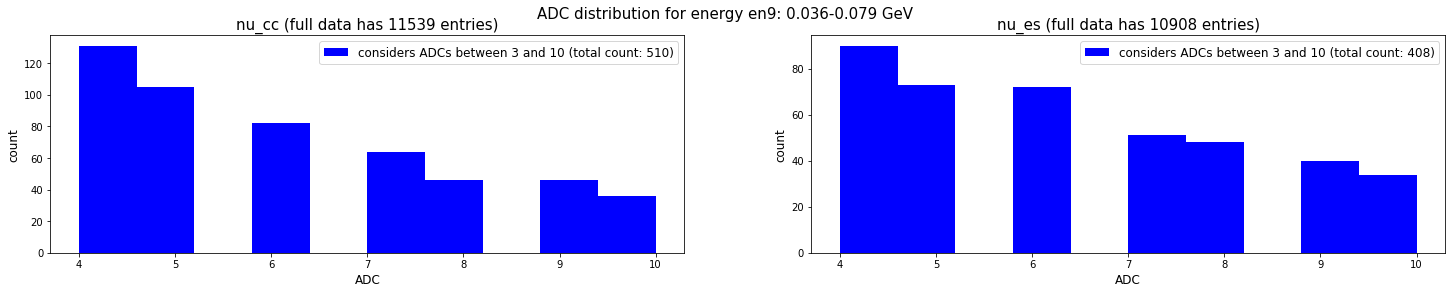

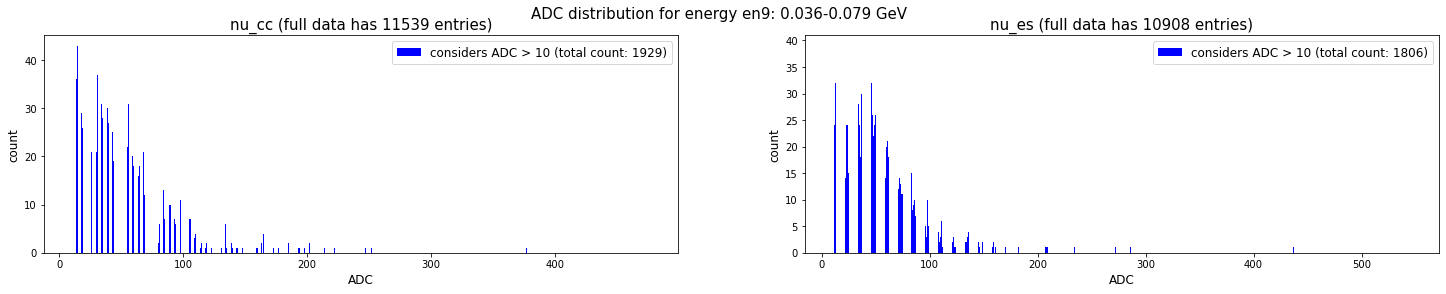

In [17]:
for i in range(5):
    make_hist_adc(path_cc, path_es, "en9",i)